In [3]:
import numpy as np

import pickle, sys

from cvxopt import matrix, solvers

import matplotlib.pyplot as plt


COLORS = ['red', 'blue']


In [4]:
def read_data(f):

    with open(f, 'rb') as f:

        data = pickle.load(f)

    x, y = data[0], data[1]

    return x, y



In [24]:
def fit(x, y):

    NUM = x.shape[0]

    DIM = x.shape[1]

    # we'll solve the dual

    # obtain the kernel

    K = y[:, None] * x
    print('K1 ', K.shape)
    K = np.dot(K, K.T)
    print('K ' , K.shape)
    P = matrix(K)
    print('P ',P.size)
    q = matrix(-np.ones((NUM, 1)))
    print('q ',q.size)
    G = matrix(-np.eye(NUM))
    print('g ',G.size)
    h = matrix(np.zeros(NUM))
    print('h ',h.size)
    A = matrix(y.reshape(1, -1))
    print('A ', A.typecode)
    b = matrix(np.zeros(1))
    print('b ', b.size)
    solvers.options['show_progress'] = False

    sol = solvers.qp(P, q, G, h, A, b)

    alphas = np.array(sol['x'])
    print(alphas.size)
    return alphas

In [6]:
def plot_data_with_labels(x, y, ax):

    unique = np.unique(y)

    for li in range(len(unique)):

        x_sub = x[y == unique[li]]

        ax.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li])


In [7]:
def plot_separator(ax, w, b):

    slope = -w[0] / w[1]

    intercept = -b / w[1]

    x = np.arange(0, 6)

    ax.plot(x, x * slope + intercept, 'k-')

In [25]:
x, y = read_data('gaussiandata.pickle')

# fit svm classifier

alphas = fit(x, y)



# get weights

w = np.sum(alphas * y[:, None] * x, axis = 0)

# get bias

cond = (alphas > 1e-4).reshape(-1)

b = y[cond] - np.dot(x[cond], w)

bias = b[0]



# normalize

norm = np.linalg.norm(w)

w, bias = w / norm, bias / norm



# show data and w

fig, ax = plt.subplots()

plot_separator(ax, w, bias)

plot_data_with_labels(x, y, ax)

plt.show()

K1  (100, 2)
K  (100, 100)
P  (100, 100)
q  (100, 1)
g  (100, 100)
h  (100, 1)
A  d
b  (1, 1)
100


In [23]:
alphas

array([[3.65505848e-09],
       [2.25263596e-09],
       [3.09667358e-09],
       [1.93015836e-09],
       [1.57660994e-09],
       [2.30107560e-09],
       [2.08469335e-09],
       [1.37236750e-09],
       [1.95174665e-09],
       [3.28492672e-09],
       [1.49726660e-09],
       [3.94861739e+00],
       [2.00251512e-09],
       [1.37906888e-09],
       [4.14540381e+00],
       [2.21863454e-09],
       [3.98363165e-09],
       [2.35637980e-09],
       [2.70462367e-09],
       [2.49170359e-09],
       [2.09985539e-09],
       [2.71623045e-09],
       [3.48798937e-09],
       [2.25271156e-09],
       [4.56654019e-09],
       [1.07405897e-09],
       [1.91121877e-09],
       [1.81236927e-09],
       [1.76166730e-09],
       [2.06846042e-09],
       [1.90453806e-09],
       [2.24890519e-09],
       [2.68774343e-09],
       [1.71354858e-09],
       [2.12695693e-09],
       [1.87910790e-09],
       [1.55884004e-09],
       [2.27849706e-09],
       [5.13939054e-09],
       [6.03014750e-09],


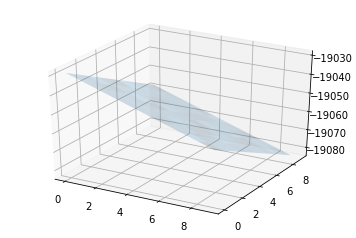

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

point  = np.array([1, 2, 3])
normal = np.array([-0.63288481, -0.74056013, -0.2258927 ])

point2 = np.array([10, 50, 50])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -4298.4824863381655

# create x,y
xx, yy = np.meshgrid(range(10), range(10))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z, alpha=0.2)


#and i would like to plot this point : 
ax.scatter(point2[0] , point2[1] , point2[2],  color='green')

plt.show()